<h1>Financial Fraud Detection Using Machine Learning</h1>
<p>This is a machine learning model to detect fraudulent transactions using the PaySim dataset.
Dataset Url = <a href url="https://www.kaggle.com/ntnu-testimon/paysim1">https://www.kaggle.com/ntnu-testimon/paysim1</a><p>
<br> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('finfraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

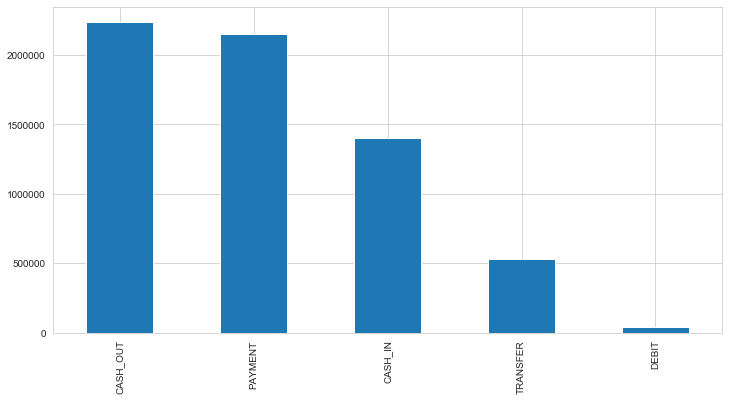

In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,6))
df['type'].value_counts().plot(kind = 'bar')

In [18]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [21]:
df[df['isFraud']==1]['type'].drop_duplicates().values

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [29]:
def cat_transform(A):
    if A=='TRANSFER' or A=='CASH_OUT':
        return 1
    else:
        return 0
df['cat'] = df['type'].apply(cat_transform)

In [30]:
df['cat'].value_counts()

0    3592211
1    2770409
Name: cat, dtype: int64

In [38]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'cat'],
      dtype='object')

In [47]:
X = df.drop(['step', 'type', 'nameOrig','nameDest', 'isFraud', 'isFlaggedFraud'],axis=1)
y = df['isFraud']

In [48]:
X.shape

(6362620, 6)

In [49]:
y.shape

(6362620,)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from xgboost import XGBClassifier

In [53]:
model = XGBClassifier()

In [59]:
%%time
model.fit(X_train, y_train)

[16:58:17] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Wall time: 6min 49s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print(accuracy_score(y_test,y_pred))

0.9994718205046995
